/home/takkan/miniconda3/envs/speech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/takkan/miniconda3/envs/speech/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/takkan/miniconda3/envs/speech/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/takkan/miniconda3/envs/sp

Text(0.5, 1.0, 'Gaussian Mixture Model')

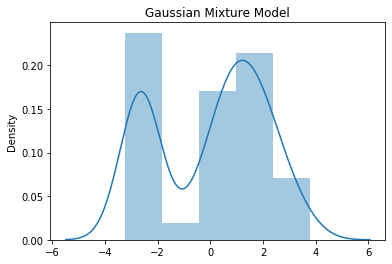

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
pca = PCA(n_components=1)
iris_data = pca.fit_transform(iris.data)
sns.distplot( iris_data )
plt.title("Gaussian Mixture Model")

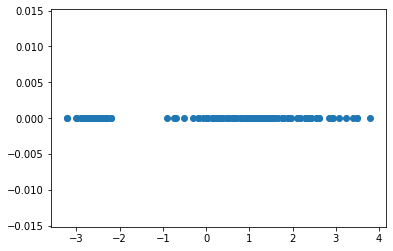

In [2]:
p = plt.subplot()
p.scatter(iris_data, [0 for i in range(len(iris_data))])
plt.show()

In [3]:
def Gaus(x,m, s): #正規分布の値を取得
    g = np.exp( - pow((x-m), 2) /(2*s) )/np.sqrt(2*np.pi * s )
    return g
 
    
def calc_gamma(x, pi, mu, sig): #事後分布の計算
    gam = pi*Gaus(x,mu,sig)
    gam/= np.sum(gam, axis=1).reshape(len(x),1)
    return gam
 
    
def update_parmas(gamma, x, pi, mu, sig): #パラメーターの更新式
    N_k = np.sum(gamma, axis=0)
    N = np.sum(N_k)
    mu_k = np.sum(x*gamma, axis=0 ) /N_k
    sig_k = np.sum(gamma* pow(x-mu, 2), axis=0) /N_k
    pi_k = N_k/N
    return pi_k , mu_k, sig_k
 
    
def iteration(x,mu,sig,pi, I=100, e=0.01): #ε以下になるか、100回計算するまで尤度を更新する関数
    LF=0   
    for i in range(I):
        gamma = calc_gamma(x, pi, mu, sig)
        LF_new =np.sum(np.log(np.sum(pi*Gaus(x,mu,sig),axis=1 )) )
        ch = LF_new - LF
        print("LF ={} . change = {}".format(LF_new, ch))
        if np.abs(ch) < e:
            print("Iteration is finished {} iter. ".format(i+1))
            break
        LF=LF_new
        pi, mu, sig = update_parmas(gamma, x, pi, mu, sig)
 
    return pi, mu, sig


In [4]:
K = 3

mu  = np.random.randn(K)
sig = np.abs(np.random.randn(K))
pi  = np.random.rand(K)
pi, mu, sig = iteration(iris_data, mu, sig, pi, I=100)

LF =-540.2545235579511 . change = -540.2545235579511
LF =-319.29539957193765 . change = 220.95912398601342
LF =-306.92241202979204 . change = 12.372987542145609
LF =-302.1790758626127 . change = 4.743336167179336
LF =-298.29578468957027 . change = 3.883291173042437
LF =-293.4322828885268 . change = 4.863501801043469
LF =-285.4766969354033 . change = 7.955585953123489
LF =-270.77320961064794 . change = 14.703487324755372
LF =-246.307523711325 . change = 24.46568589932295
LF =-234.47074254130675 . change = 11.836781170018241
LF =-234.3807945523436 . change = 0.0899479889631607
LF =-234.34690626402408 . change = 0.033888288319502635
LF =-234.32935841332466 . change = 0.017547850699429546
LF =-234.31999857037044 . change = 0.009359842954211217
Iteration is finished 14 iter. 


In [5]:
print(pi, mu, np.sqrt(sig) )

[0.33304474 0.1035852  0.56337007] [-2.64263071  1.37725797  1.30899874] [0.21903076 1.0944971  1.0079685 ]


/home/takkan/miniconda3/envs/speech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/takkan/miniconda3/envs/speech/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/takkan/miniconda3/envs/speech/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/takkan/miniconda3/envs/sp

Text(0.5, 1.0, 'Predicted GMM')

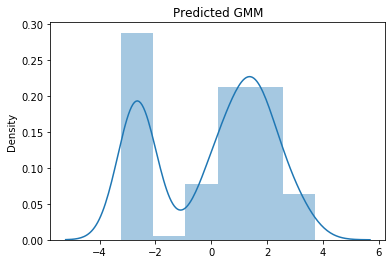

In [6]:
y0 = np.random.normal(loc=mu[0], scale=np.sqrt(sig)[0] , size =int(300*pi[0]) ).reshape(-1,1)
y1 = np.random.normal(loc=mu[1], scale=np.sqrt(sig)[1] , size =int(300*pi[1]) ).reshape(-1,1)
y2 = np.random.normal(loc=mu[2], scale=np.sqrt(sig)[2] , size =int(300*pi[2]) ).reshape(-1,1)
y=np.concatenate([y0, y1, y2])
sns.distplot(y)
plt.title("Predicted GMM")